# Support Vector Machine
## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

**Importing the datasets**

In [2]:
df = pd.read_csv('Dataset/testing/fsi-2014-to2020.csv')
df

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,Yemen,2020,1st,112.4,9.7,10.0,9.7,9.4,7.8,7.0,9.9,9.5,10.0,9.8,9.7,10.0,-1.1
1,Somalia,2020,2nd,110.9,9.8,10.0,8.6,9.1,9.4,8.9,8.9,9.1,9.0,10.0,9.1,9.0,-1.3
2,South Sudan,2020,3rd,110.8,9.4,9.7,9.1,9.5,9.2,6.8,9.9,9.5,9.0,9.5,9.7,9.5,-1.4
3,Syria,2020,4th,110.7,9.9,9.9,10.0,8.7,7.2,8.4,10.0,9.1,10.0,7.6,10.0,10.0,-0.9
4,Congo Democratic Republic,2020,5th,109.4,8.5,9.8,9.7,8.0,8.6,6.9,9.7,9.5,9.5,9.8,10.0,9.4,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,Switzerland,2014,174th,23.3,1.7,1.0,3.5,2.2,2.4,2.4,0.9,1.7,1.7,2.4,1.8,1.6,NaN
1241,Norway,2014,175th,23.0,2.8,1.1,3.7,2.0,1.7,1.9,0.5,1.7,1.6,2.3,2.2,1.5,NaN
1242,Denmark,2014,176th,22.8,1.8,1.4,3.4,2.2,1.8,2.0,0.8,1.7,1.6,2.8,1.4,1.9,NaN
1243,Sweden,2014,177th,21.4,2.4,1.8,1.0,2.0,1.8,1.8,0.8,1.8,1.3,2.8,2.6,1.3,NaN


In [3]:
df.shape


(1245, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           1245 non-null   object 
 1   Year                              1245 non-null   int64  
 2   Rank                              1245 non-null   object 
 3   Total                             1245 non-null   float64
 4   C1: Security Apparatus            1245 non-null   float64
 5   C2: Factionalized Elites          1245 non-null   float64
 6   C3: Group Grievance               1245 non-null   float64
 7   E1: Economy                       1245 non-null   float64
 8   E2: Economic Inequality           1245 non-null   float64
 9   E3: Human Flight and Brain Drain  1245 non-null   float64
 10  P1: State Legitimacy              1245 non-null   float64
 11  P2: Public Services               1245 non-null   float64
 12  P3: Hu

In [5]:
filtw =(df['Total'] >=60.0) & (df['Total'] <= 89.9) 
filts =(df['Total'] >=0.0) & (df['Total'] <= 29.9) 
filtst =(df['Total'] >=30) & (df['Total'] <= 59.9)
filta =(df['Total'] >=90)
filtn =(df['Total'] < 0)

In [6]:
df['cluster']= df['Total']

In [7]:
df.drop(columns=['Rank'],inplace=True)
df

,Country,Year,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year,cluster
0,Yemen,2020,112.4,9.7,10.0,9.7,9.4,7.8,7.0,9.9,9.5,10.0,9.8,9.7,10.0,-1.1,112.4
1,Somalia,2020,110.9,9.8,10.0,8.6,9.1,9.4,8.9,8.9,9.1,9.0,10.0,9.1,9.0,-1.3,110.9
2,South Sudan,2020,110.8,9.4,9.7,9.1,9.5,9.2,6.8,9.9,9.5,9.0,9.5,9.7,9.5,-1.4,110.8
3,Syria,2020,110.7,9.9,9.9,10.0,8.7,7.2,8.4,10.0,9.1,10.0,7.6,10.0,10.0,-0.9,110.7
4,Congo Democratic Republic,2020,109.4,8.5,9.8,9.7,8.0,8.6,6.9,9.7,9.5,9.5,9.8,10.0,9.4,-0.8,109.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,Switzerland,2014,23.3,1.7,1.0,3.5,2.2,2.4,2.4,0.9,1.7,1.7,2.4,1.8,1.6,NaN,23.3
1241,Norway,2014,23.0,2.8,1.1,3.7,2.0,1.7,1.9,0.5,1.7,1.6,2.3,2.2,1.5,NaN,23.0
1242,Denmark,2014,22.8,1.8,1.4,3.4,2.2,1.8,2.0,0.8,1.7,1.6,2.8,1.4,1.9,NaN,22.8
1243,Sweden,2014,21.4,2.4,1.8,1.0,2.0,1.8,1.8,0.8,1.8,1.3,2.8,2.6,1.3,NaN,21.4


In [8]:
df.loc[filta,'cluster']=4
df.loc[filtw,'cluster']=3
df.loc[filts,'cluster']=2
df.loc[filtst,'cluster']=1
df.loc[filtn,'cluster']=0
df

,Country,Year,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year,cluster
0,Yemen,2020,112.4,9.7,10.0,9.7,9.4,7.8,7.0,9.9,9.5,10.0,9.8,9.7,10.0,-1.1,1.0
1,Somalia,2020,110.9,9.8,10.0,8.6,9.1,9.4,8.9,8.9,9.1,9.0,10.0,9.1,9.0,-1.3,1.0
2,South Sudan,2020,110.8,9.4,9.7,9.1,9.5,9.2,6.8,9.9,9.5,9.0,9.5,9.7,9.5,-1.4,1.0
3,Syria,2020,110.7,9.9,9.9,10.0,8.7,7.2,8.4,10.0,9.1,10.0,7.6,10.0,10.0,-0.9,1.0
4,Congo Democratic Republic,2020,109.4,8.5,9.8,9.7,8.0,8.6,6.9,9.7,9.5,9.5,9.8,10.0,9.4,-0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,Switzerland,2014,23.3,1.7,1.0,3.5,2.2,2.4,2.4,0.9,1.7,1.7,2.4,1.8,1.6,NaN,0.0
1241,Norway,2014,23.0,2.8,1.1,3.7,2.0,1.7,1.9,0.5,1.7,1.6,2.3,2.2,1.5,NaN,0.0
1242,Denmark,2014,22.8,1.8,1.4,3.4,2.2,1.8,2.0,0.8,1.7,1.6,2.8,1.4,1.9,NaN,0.0
1243,Sweden,2014,21.4,2.4,1.8,1.0,2.0,1.8,1.8,0.8,1.8,1.3,2.8,2.6,1.3,NaN,0.0


In [9]:
import matplotlib.pyplot as plt
 


total = df['Total']
e = df['Country']

fig = plt.figure(figsize=(100,50))
 
# creating the bar plot
plt.bar(country, total, color ='orange',
        width = 0.4)
 
plt.xlabel("Country")
plt.ylabel("Total")
plt.title("Country v/s Total")
plt.show()

In [10]:
X=df.loc[:, ['E1: Economy','Total']].values
X

array([[  9.4, 112.4],
       [  9.1, 110.9],
       [  9.5, 110.8],
       ...,
       [  2.2,  22.8],
       [  2. ,  21.4],
       [  3.5,  18.7]])

In [11]:
Y=df.loc[:, 'cluster'].values
Y

array([1., 1., 1., ..., 0., 0., 0.])

In [12]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [13]:
Y_Train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1.

In [14]:
Y_Test

array([0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1.

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

In [17]:
Y_Pred = classifier.predict(X_Test)


## Evaluation Results

In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test,Y_Pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       106
         1.0       0.99      1.00      1.00       206

    accuracy                           0.99       312
   macro avg       1.00      0.99      0.99       312
weighted avg       0.99      0.99      0.99       312



## Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[104,   2],
       [  0, 206]])

In [20]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X_Set


array([[ 0.75912379,  0.92228018],
       [ 0.03168817,  0.59806831],
       [ 1.22676098,  0.98878518],
       ...,
       [-0.17615058, -1.06871325],
       [ 1.27872066,  1.03866393],
       [-0.53986839, -1.19341012]])

In [21]:
Y_Set

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1.

In [22]:
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

In [23]:
X1

array([[-3.30649776, -3.29649776, -3.28649776, ...,  3.24350224,
         3.25350224,  3.26350224],
       [-3.30649776, -3.29649776, -3.28649776, ...,  3.24350224,
         3.25350224,  3.26350224],
       [-3.30649776, -3.29649776, -3.28649776, ...,  3.24350224,
         3.25350224,  3.26350224],
       ...,
       [-3.30649776, -3.29649776, -3.28649776, ...,  3.24350224,
         3.25350224,  3.26350224],
       [-3.30649776, -3.29649776, -3.28649776, ...,  3.24350224,
         3.25350224,  3.26350224],
       [-3.30649776, -3.29649776, -3.28649776, ...,  3.24350224,
         3.25350224,  3.26350224]])

In [24]:
X2

array([[-3.25333355, -3.25333355, -3.25333355, ..., -3.25333355,
        -3.25333355, -3.25333355],
       [-3.24333355, -3.24333355, -3.24333355, ..., -3.24333355,
        -3.24333355, -3.24333355],
       [-3.23333355, -3.23333355, -3.23333355, ..., -3.23333355,
        -3.23333355, -3.23333355],
       ...,
       [ 2.87666645,  2.87666645,  2.87666645, ...,  2.87666645,
         2.87666645,  2.87666645],
       [ 2.88666645,  2.88666645,  2.88666645, ...,  2.88666645,
         2.88666645,  2.88666645],
       [ 2.89666645,  2.89666645,  2.89666645, ...,  2.89666645,
         2.89666645,  2.89666645]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


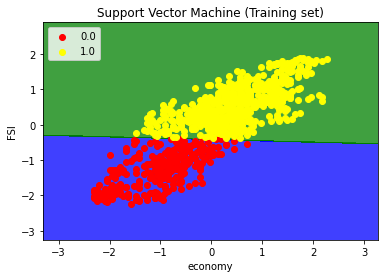

In [25]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'yellow'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('economy')
plt.ylabel('FSI')
plt.legend()
plt.legend()
    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


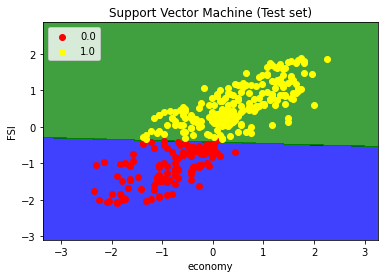

In [26]:

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'yellow'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('economy')
plt.ylabel('FSI')
plt.legend()
plt.show()